# Number of cells for each samples and representativity

Using a strinct threshold to label the cells result in a high number of cells labelled as "Others" and not suitable for downstream analyais, let's check how many cells we lost:


In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MM

In [2]:
adata_mm = sc.read("Data/75/mm_nk_processed.h5ad")

In [3]:
tot_cells = adata_mm.n_obs
print(f"Initial number of cells: {tot_cells}")

Initial number of cells: 14103


In [4]:
def sample_metrics(adata):
    tot_cells = adata.n_obs
    per_sample = adata.obs.batch.value_counts()
    n_sample = per_sample.shape[0]
    avg_sample = round(per_sample.mean(),2)
    high_sample = per_sample[per_sample > 10].shape[0]
    print(f"Total number of cells: {tot_cells}\n\
Number of samples: {n_sample}\n\
Average cells per sample: {avg_sample}\n\
n Sample with more than 10 cells: {high_sample}")
    
    plot = per_sample.plot(kind='bar')
    plot.set_xlabel("Samples")
    plot.set_ylabel("Number of cells")
    plot.set_xticklabels("")
    plt.show()
    
    return tot_cells, per_sample, n_sample

## All NK cells:

Total number of cells: 14103
Number of samples: 76
Average cells per sample: 185.57
n Sample with more than 10 cells: 61


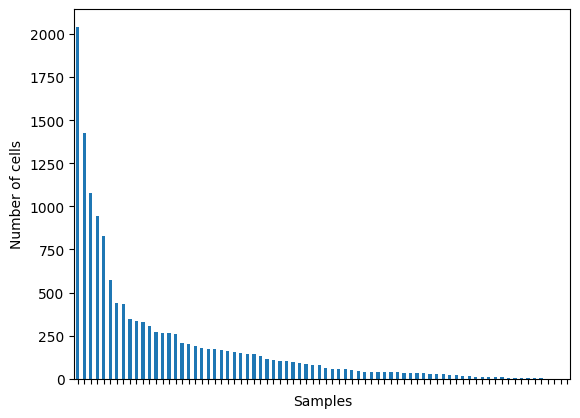

In [5]:
tot_all, per_sample_all, n_sample_all = sample_metrics(adata_mm)

## Labelled NK cells

In [6]:
adata_mm_label = adata_mm[adata_mm.obs.new_label != "Others"].copy()

Total number of cells: 3519
Number of samples: 70
Average cells per sample: 50.27
n Sample with more than 10 cells: 41


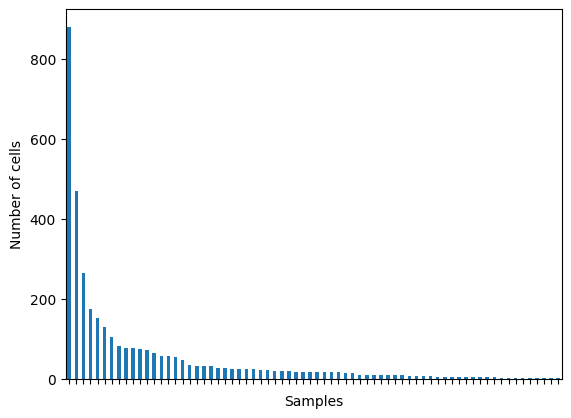

In [7]:
tot_label, per_sample_label, n_sample_label = sample_metrics(adata_mm_label)

In [8]:
print(f"labelled cells: {round((tot_label/tot_all)*100,2)}%\n\
Kept samples : {round((n_sample_label/n_sample_all)*100,2)}%\n\
Average representativeness per sample: {round((per_sample_label/per_sample_all).mean()*100,2)}%")

labelled cells: 24.95%
Kept samples : 92.11%
Average representativeness per sample: 25.15%


## Resident

In [9]:
adata_mm_res = adata_mm[adata_mm.obs.new_label == "NK resident"].copy()

Total number of cells: 1723
Number of samples: 62
Average cells per sample: 27.79
n Sample with more than 10 cells: 25


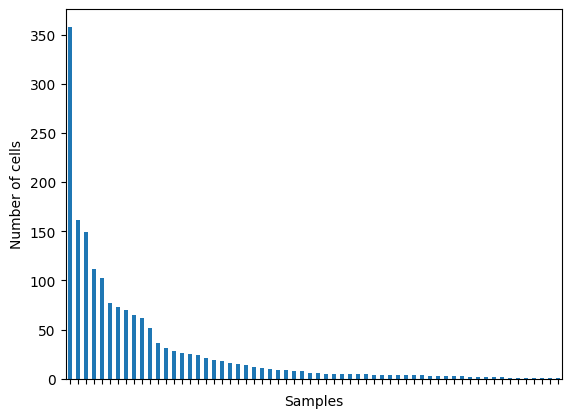

In [10]:
tot_res, per_sample_res, n_sample_res = sample_metrics(adata_mm_res)

In [11]:
print(f"resident cells compared to total: {round((tot_res/tot_all)*100,2)}% \n\
resident cells compared to labelled: {round((tot_res/tot_label)*100,2)}%\n\
Kept samples : {round((n_sample_res/n_sample_all)*100,2)}%\n\
Average representativeness per sample: {round((per_sample_res/per_sample_all).mean()*100,2)}%")

resident cells compared to total: 12.22% 
resident cells compared to labelled: 48.96%
Kept samples : 81.58%
Average representativeness per sample: 17.53%


## Exhausted

In [12]:
adata_mm_exh = adata_mm[adata_mm.obs.new_label == "NK exhausted"].copy()

Total number of cells: 1796
Number of samples: 58
Average cells per sample: 30.97
n Sample with more than 10 cells: 22


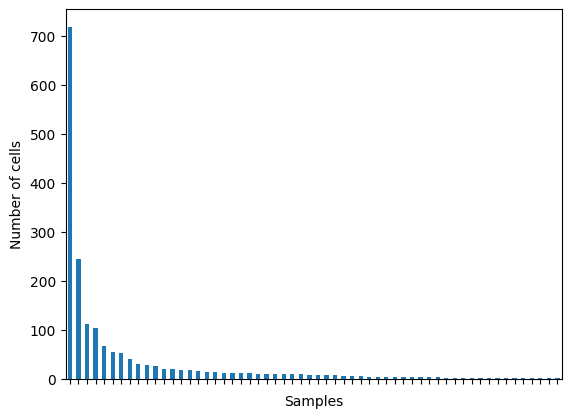

In [13]:
tot_exh, per_sample_exh, n_sample_exh = sample_metrics(adata_mm_exh)

In [14]:
print(f"exhuasted cells compared to total: {round((tot_exh/tot_all)*100,2)}% \n\
exhuasted cells compared to labelled: {round((tot_exh/tot_label)*100,2)}%\n\
Kept samples : {round((n_sample_exh/n_sample_all)*100,2)}%\n\
Average representativeness per sample: {round((per_sample_exh/per_sample_all).mean()*100,2)}%")

exhuasted cells compared to total: 12.73% 
exhuasted cells compared to labelled: 51.04%
Kept samples : 76.32%
Average representativeness per sample: 11.61%


In [15]:
df = pd.DataFrame({"Label": per_sample_label,"All":per_sample_all})#, "Resident": per_sample_res, "Exhausted": per_sample_exh})
df = df.fillna(0)

In [16]:
df = df.sort_values(by="All", ascending=False)
df_partial = df.copy()
df_partial["All"] = (per_sample_all.sub(per_sample_label,fill_value=0))
df_partial["NK exh"] = (per_sample_label.sub(per_sample_res,fill_value=0))
df_partial["NK res"] = (per_sample_label.sub(per_sample_exh,fill_value=0))
df_partial = df_partial[["NK exh", "NK res", "All"]]
df_partial = df_partial.fillna(0)
# df_partial = df_partial[["Label", "All"]]

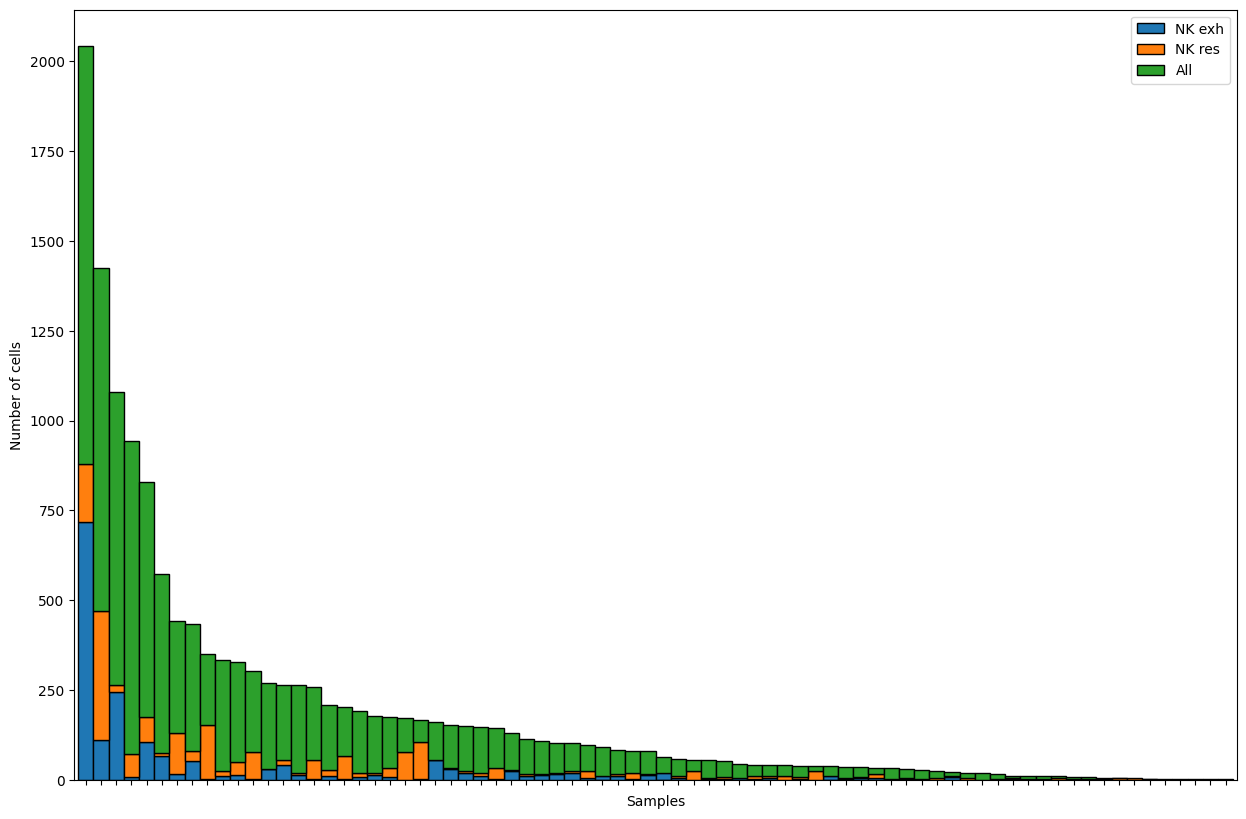

In [17]:
plot = df_partial.plot.bar(stacked=True, width=1, edgecolor="black")
plot.set_xlabel("Samples")
plot.set_ylabel("Number of cells")
plot.set_xticklabels("")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [18]:
for column,values in df_partial.items():
    df_partial[column] = df_partial[column]/df["All"]
    

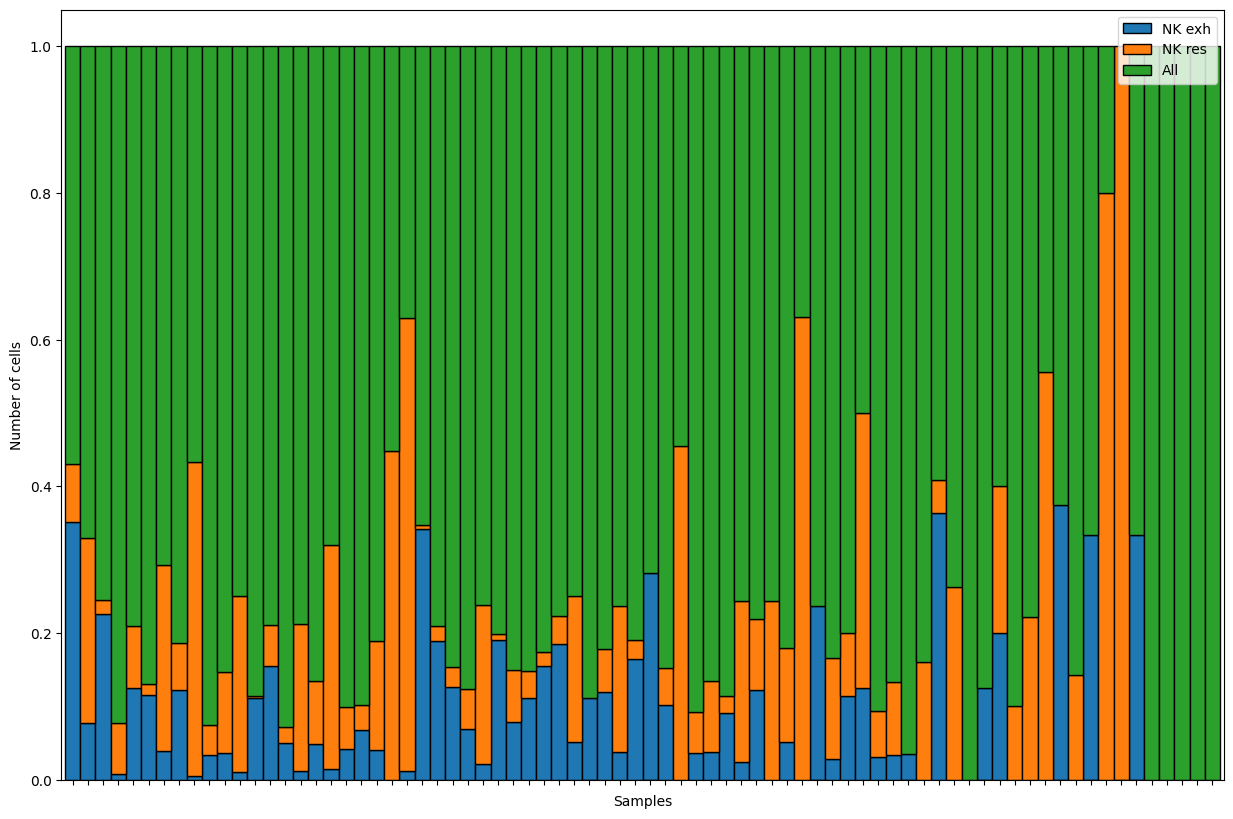

In [19]:
plot = df_partial.plot.bar(stacked=True, width=1, edgecolor="black")
plot.set_xlabel("Samples")
plot.set_ylabel("Number of cells")
plot.set_xticklabels("")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [20]:
print(f"Samples with no cell preserved:")
df[df["Label"] == 0]

Samples with no cell preserved:


,Label,All
PMM_BM_11,0.0,18
PMM_Plasma_9,0.0,2
RRMM_CD138p_2,0.0,1
PMM_Plasma_4,0.0,1
PMM_CD138p_7,0.0,1
PMM_CD138p_6,0.0,1


# Healthy

In [21]:
adata_ht = sc.read("Data/75/heathy_nk_processed.h5ad")

In [22]:
tot_cells = adata_ht.n_obs
print(f"Initial number of cells: {tot_cells}")

Initial number of cells: 7596


In [23]:
def sample_metrics(adata):
    tot_cells = adata.n_obs
    per_sample = adata.obs.batch.value_counts()
    n_sample = per_sample.shape[0]
    avg_sample = round(per_sample.mean(),2)
    high_sample = per_sample[per_sample > 10].shape[0]
    print(f"Total number of cells: {tot_cells}\n\
Number of samples: {n_sample}\n\
Average cells per sample: {avg_sample}\n\
n Sample with more than 10 cells: {high_sample}")
    
    plot = per_sample.plot(kind='bar')
    plot.set_xlabel("Samples")
    plot.set_ylabel("Number of cells")
    plot.set_xticklabels("")
    plt.show()
    
    return tot_cells, per_sample, n_sample

## All NK cells:

Total number of cells: 7596
Number of samples: 35
Average cells per sample: 217.03
n Sample with more than 10 cells: 30


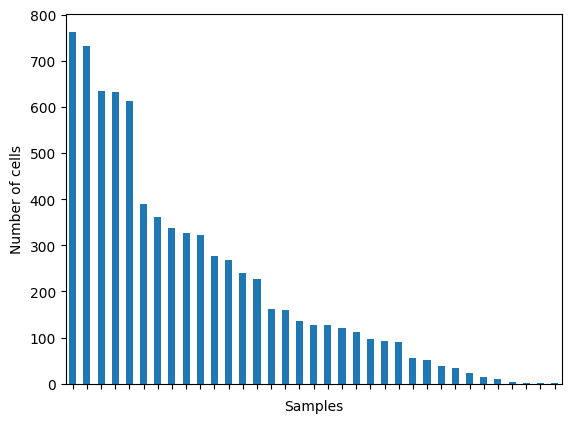

In [24]:
tot_all, per_sample_all, n_sample_all = sample_metrics(adata_ht)

## Labelled NK cells

In [25]:
adata_ht_label = adata_ht[adata_ht.obs.new_label != "Others"].copy()

Total number of cells: 1898
Number of samples: 34
Average cells per sample: 55.82
n Sample with more than 10 cells: 25


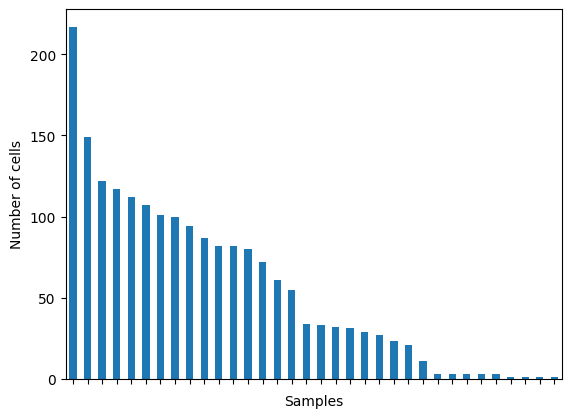

In [26]:
tot_label, per_sample_label, n_sample_label = sample_metrics(adata_ht_label)

In [27]:
print(f"labelled cells: {round((tot_label/tot_all)*100,2)}%\n\
Kept samples : {round((n_sample_label/n_sample_all)*100,2)}%\n\
Average representativeness per sample: {round((per_sample_label/per_sample_all).mean()*100,2)}%")

labelled cells: 24.99%
Kept samples : 97.14%
Average representativeness per sample: 30.73%


## Resident

In [28]:
adata_ht_res = adata_ht[adata_ht.obs.new_label == "NK resident"].copy()

Total number of cells: 1784
Number of samples: 33
Average cells per sample: 54.06
n Sample with more than 10 cells: 24


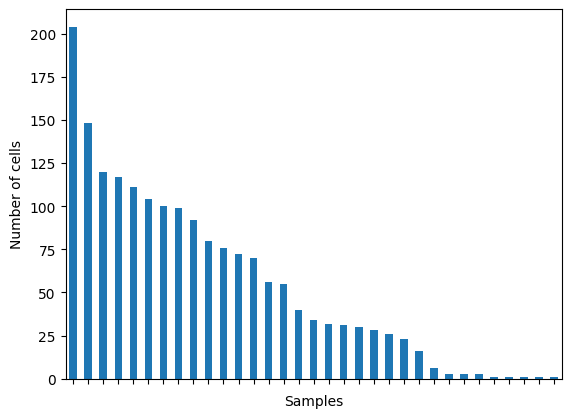

In [29]:
tot_res, per_sample_res, n_sample_res = sample_metrics(adata_ht_res)

In [30]:
print(f"resident cells compared to total: {round((tot_res/tot_all)*100,2)}% \n\
resident cells compared to labelled: {round((tot_res/tot_label)*100,2)}%\n\
Kept samples : {round((n_sample_res/n_sample_all)*100,2)}%\n\
Average representativeness per sample: {round((per_sample_res/per_sample_all).mean()*100,2)}%")

resident cells compared to total: 23.49% 
resident cells compared to labelled: 93.99%
Kept samples : 94.29%
Average representativeness per sample: 30.1%


## Exhausted

In [31]:
adata_ht_exh = adata_ht[adata_ht.obs.new_label == "NK exhausted"].copy()

Total number of cells: 114
Number of samples: 22
Average cells per sample: 5.18
n Sample with more than 10 cells: 4


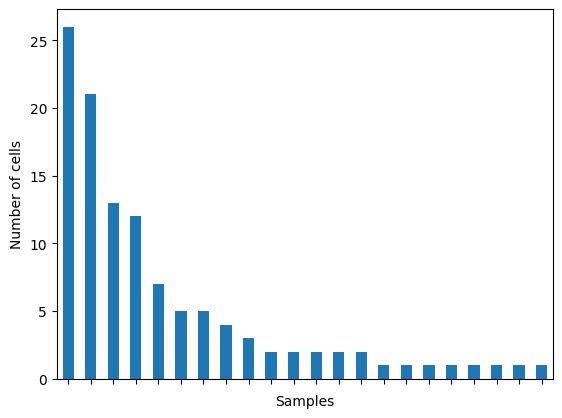

In [32]:
tot_exh, per_sample_exh, n_sample_exh = sample_metrics(adata_ht_exh)

In [33]:
print(f"exhuasted cells compared to total: {round((tot_exh/tot_all)*100,2)}% \n\
exhuasted cells compared to labelled: {round((tot_exh/tot_label)*100,2)}%\n\
Kept samples : {round((n_sample_exh/n_sample_all)*100,2)}%\n\
Average representativeness per sample: {round((per_sample_exh/per_sample_all).mean()*100,2)}%")

exhuasted cells compared to total: 1.5% 
exhuasted cells compared to labelled: 6.01%
Kept samples : 62.86%
Average representativeness per sample: 2.34%


In [34]:
df = pd.DataFrame({"Label": per_sample_label,"All":per_sample_all})#, "Resident": per_sample_res, "Exhausted": per_sample_exh})
df = df.fillna(0)

In [35]:
df = df.sort_values(by="All", ascending=False)
df_partial = df.copy()
df_partial["All"] = (per_sample_all.sub(per_sample_label,fill_value=0))
df_partial["NK exh"] = (per_sample_label.sub(per_sample_res,fill_value=0))
df_partial["NK res"] = (per_sample_label.sub(per_sample_exh,fill_value=0))
df_partial = df_partial[["NK exh", "NK res", "All"]]
df_partial = df_partial.fillna(0)
# df_partial = df_partial[["Label", "All"]]

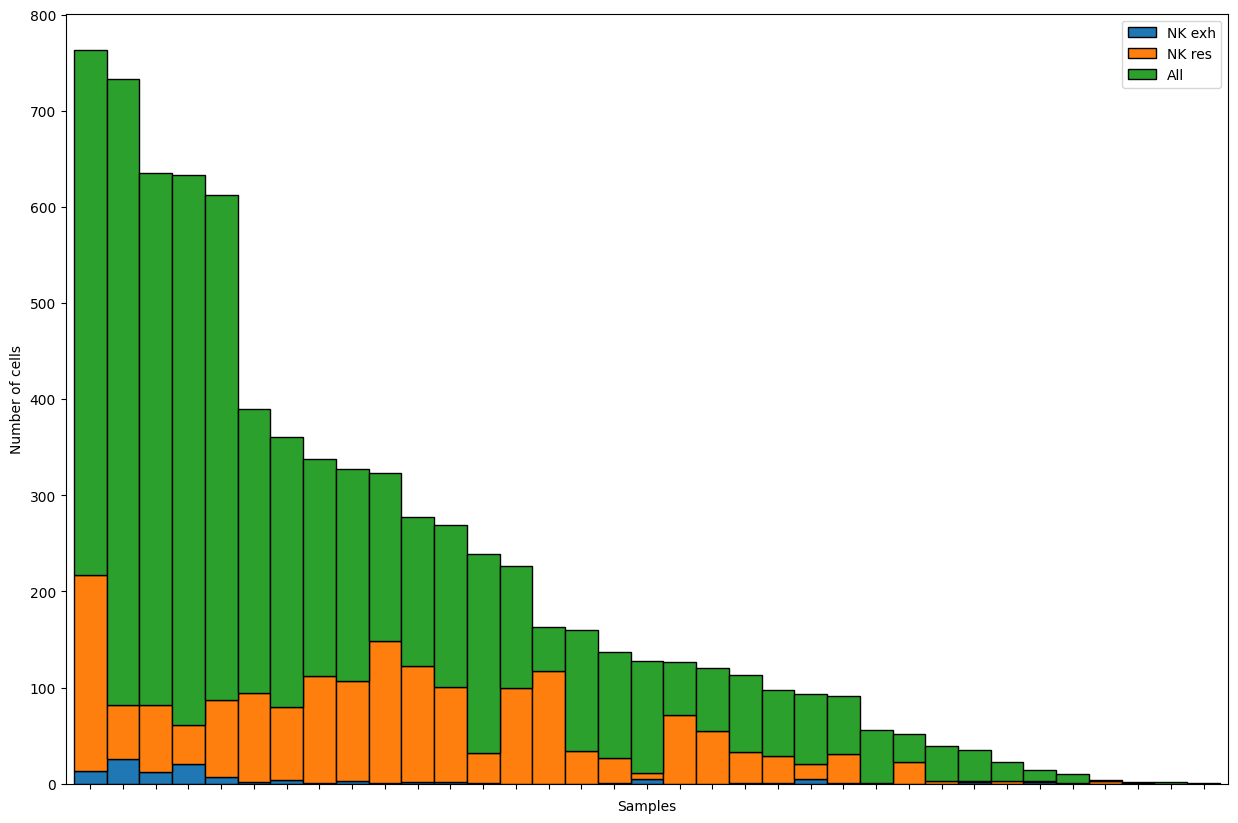

In [36]:
plot = df_partial.plot.bar(stacked=True, width=1, edgecolor="black")
plot.set_xlabel("Samples")
plot.set_ylabel("Number of cells")
plot.set_xticklabels("")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [37]:
for column,values in df_partial.items():
    df_partial[column] = df_partial[column]/df["All"]
    

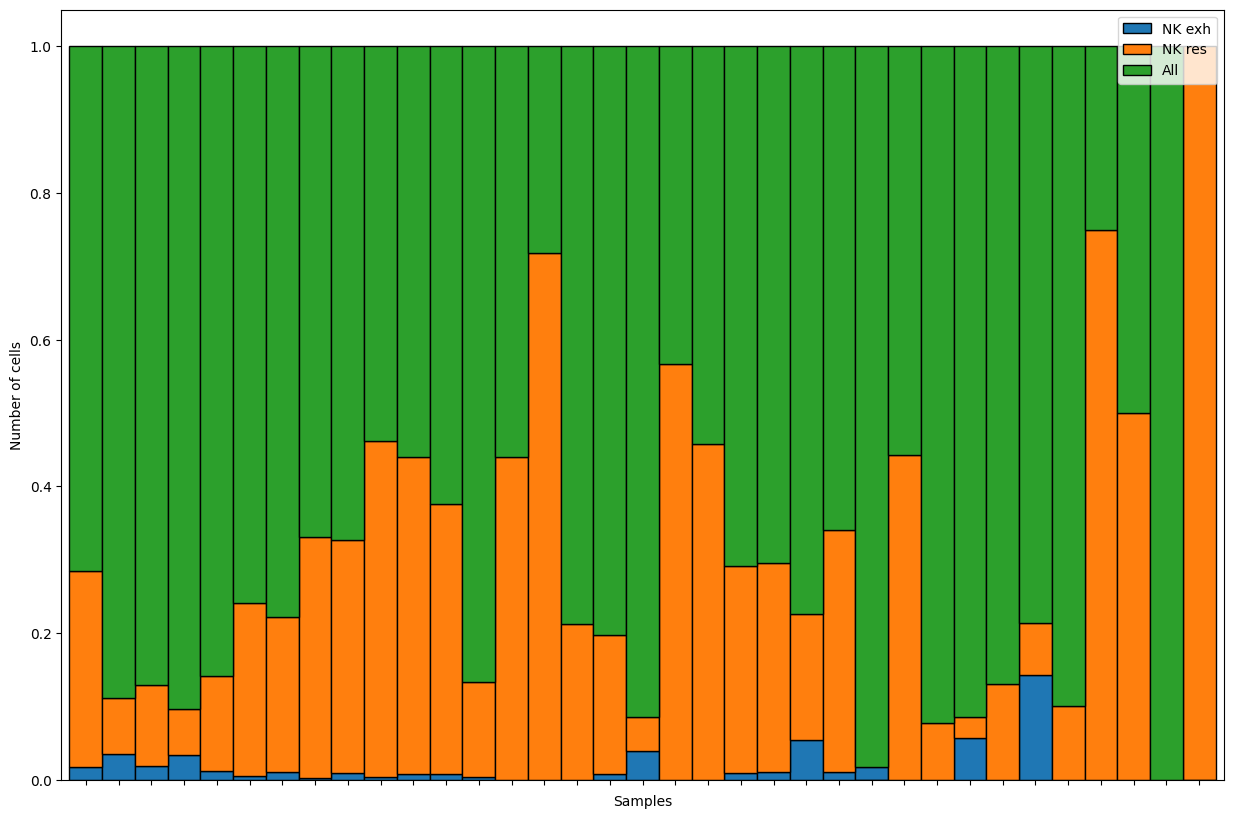

In [38]:
plot = df_partial.plot.bar(stacked=True, width=1, edgecolor="black")
plot.set_xlabel("Samples")
plot.set_ylabel("Number of cells")
plot.set_xticklabels("")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [39]:
print(f"Samples with no cell preserved:")
df[df["Label"] == 0]

Samples with no cell preserved:


,Label,All
Healthy_CD138n_9,0.0,2
